<a href="https://colab.research.google.com/github/anshukcse/Bank-Loan-Model/blob/master/Bank_Loan_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marketing Campaign for Banking Products
![picture](https://github.com/anshukcse/Bank-Loan-Model/blob/master/Bank%20Campaign.jpg?raw=true)


> ## **Introduction**
The case is, the Bank has a Dataset with various characteristics of the customers. The management built a new product which is Personal Loan, and ran a small campaign towards selling the New Product to their clients. After some time, 9% of customers have Personal Loan from The Bank.


> ## **Goal:** 
> *   To sell more Personal Loan products to Bank customers.
> *   To devise campaigns to better target marketing to increase the success ratio with a minimal budget.
> *   To identify the potential customers who have a higher probability of purchasing the loan.

Increase the success ratio of advertisement campaign while at the same time reduce the cost of the campaign.





> ## **The Questions for the Data Analysis**
As soon as we got 9% of customers who bought the Product, we got the following questions:
> *   Is there some associations between personal characteristics and the fact that customer bought the Product?
> *   What are those Main Characteristics that have an association with the Product and what is the strength of the association?
> *   What are the Segments of Main Characteristics, that have a higher strength of association with the Product?
> *   What is the sample of Data with customers from Main Segments?



> ## **Approach**
Here, I have explained simple step-by-step analysis of customer's characteristics to identify patterns to effectively choose the subset of customers who have a higher probability to buy new product "Personal Loan" from The Bank. <br> <br>
**The brief description of the performed steps:**
*   We check all twelve characteristics whether or not each of them has an association with the fact the product been sold.
*   We find FIVE main characteristics that have higher than moderate strength of association with the product.
*   We analyze main characteristics and get segments in each with different strength of association with the product.
*   We tried to make a subset of customers with ideal characteristics who has the highest probability to buy the product. Unfortunately, our dataset does not contain such information. So...
*   We build a simple algorithm to make a subset of data to get the customers IDs who have a high probability to buy the product.

> ## **Technologies**
*   Python
*   Pandas
*   Numpy
*   Seaborn
*   Matplotlib


---



---



---



## **Import Library and Dataset**

In [2]:
# Import Library
import pandas as pd             
import numpy as np              
import matplotlib.pyplot as plt 
import seaborn as sns   
sns.set(color_codes = True)        

#get rid of future warnings with seaborn
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Upload the Dataset file in Excel format
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling.xlsx


In [4]:
# Loading the dataset into the Data-Frame
import io 
data = pd.read_excel(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.xlsx']), sheet_name='Data')
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


## **Understanding the Dataset**

**Variables Definition**
 
*   ID                 : Customer ID
*   Age                : Customer's age in completed years

*   Experience         : years of professional experience

*   Income             : Annual income of the customer ($000)

*   ZIP Code: Home Address ZIP code.

*   Family             : Family size of the customer
*   CCAvg: Avg. spending on credit cards per month ($000)


*   Education          : Education Level. 1: Undergrad; 2: Graduate; 3:
Advanced/Professional


*   Mortgage           : Value of house mortgage if any. ($000)


*   Personal Loan      : Did this customer accept the personal loan offered in the last
campaign?

*   Securities Account : Does the customer have a securities account with the bank?

*   CD Account         : Does the customer have a certificate of deposit (CD) account with
the bank?

*   Online             : Does the customer use internet banking facilities?


*   Credit card        : Does the customer use a credit card issued by the bank?





In [5]:
# Number of rows & columns of the data
data.shape

(5000, 14)

In [6]:
# Data types of all the feature columns
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
#Number of Null values in the data:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
# The first 10 rows of the data
data.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [9]:
#Summary of Statistics of the data(mean, min, std, etc.)
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


> ## **Observation**
*   We have 5000 rows with 14 different feature columns
*   All feature columns are in either intergers or decimal formats
*   No null values is there in any rows
*   No missing values
*   Columns **ID** & **ZIP CODE** are nominal variables. They should be in String type.
*   Column "Experience" has some negative value. We will fix it in later section
*   All other columns has clean data


---



---



---




# Cleaning the Dataset

> **Fix the negative values of "Experience" column**

In [10]:
#check the ammount of negative values
data[data['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

Lets find the quantitive variable with strong association with **'Experience'**

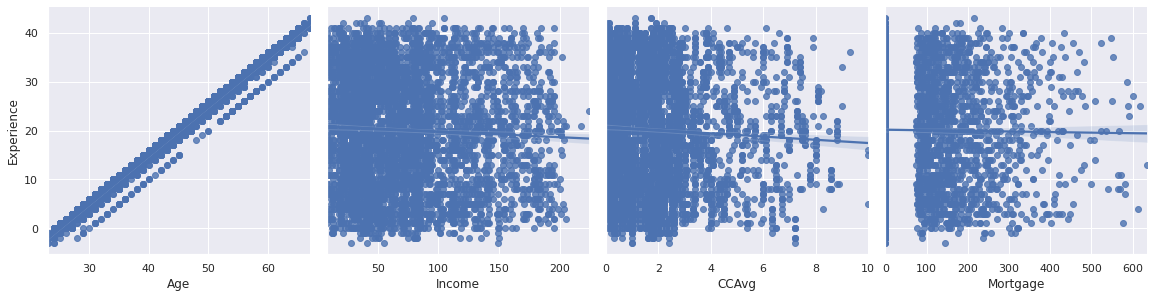

In [11]:
ncol = ['Age', 'Income','CCAvg', 'Mortgage']
grid = sns.PairGrid(data, y_vars = 'Experience', x_vars = ncol, height = 4)
grid.map(sns.regplot);

**'Age'** has a very strong association with **'Experience'**



In [12]:
# Get the subset of 'Age' data with negative values in 'Experience
data[data['Experience'] < 0]['Age'].value_counts()

25    18
24    17
23    12
29     3
28     1
26     1
Name: Age, dtype: int64

> **Observation:** <br>
The subset of each age with negative values in 'Experience' is definitely small.
<br><br>
> **Decision:** We can replace each negative 'Experience' value with the mean of positive 'Experience' value associated with the particular 'Age' value

In [13]:
# Get a list of 'Age' values where we found some negative values in 'Experience'
ages = data[data['Experience'] < 0]['Age'].unique().tolist()
ages

[25, 24, 28, 23, 29, 26]

In [15]:
# Get indexes of negative values in 'Experience'
indexes = data[data['Experience'] < 0].index.tolist()

In [16]:
# Replace nagative 'Experience' values with the means
for i in indexes:
    for x in ages:
        data.loc[i,'Experience'] = data[(data.Age == x) & (data.Experience > 0)].Experience.mean()

In [17]:
# Test
print(data[data['Experience'] < 0]['Age'].value_counts())
print("\n")
data.Experience.describe()


Series([], Name: Age, dtype: int64)




count    5000.000000
mean       20.135743
std        11.413140
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [18]:
# Convert the datacet into csv format
data.to_csv('data.csv', index = False)
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1


> All Data is clean and we can start Analysis




---



---



---



# Exploratory Data Analysis
The Exploratory data analysis is an approach to analyzing the dataset to summarize their main characteristics, often with visual method

> ## **Categorical Variables Analysis**

In [19]:
# Number of unique in each column
data.nunique(axis=0)

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [20]:
l = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for col in l:
    print(col)
    print(data[col].value_counts())
    print("__"*20)
    print("\n")

Family
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
________________________________________


Education
1    2096
3    1501
2    1403
Name: Education, dtype: int64
________________________________________


Personal Loan
0    4520
1     480
Name: Personal Loan, dtype: int64
________________________________________


Securities Account
0    4478
1     522
Name: Securities Account, dtype: int64
________________________________________


CD Account
0    4698
1     302
Name: CD Account, dtype: int64
________________________________________


Online
1    2984
0    2016
Name: Online, dtype: int64
________________________________________


CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64
________________________________________




> Lets try to plot these data and get more clear insights.

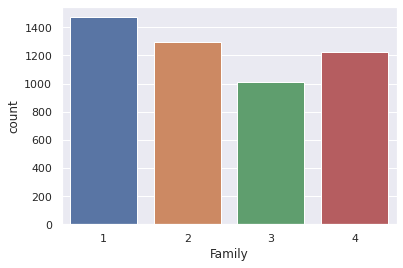

In [21]:
# Plot the Bar Graph for "Family"
sns.countplot(data['Family'])

> **Observation:** Most of the customers are single

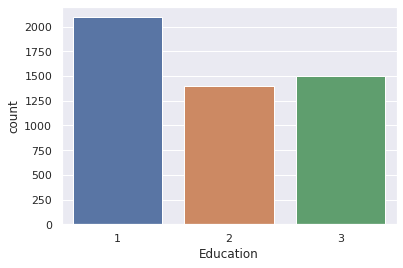

In [22]:
# Plot the Bar Graph for "Education"
sns.countplot(data['Education'])

> **Observation:** Most of the customers are undergraduate. 

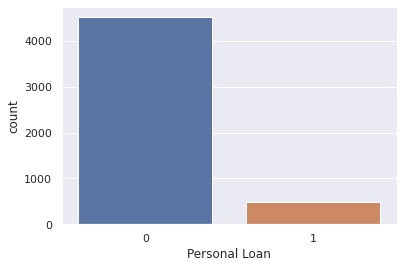

In [23]:
# Plot the Bar Graph for "Peronal Loan"
sns.countplot(data['Personal Loan'])

> **Observation:** It seems that very people have taken personal loan previous year. Only 480 people from 5000 has acquired the loan. That is only 9.6% of total customers took the loan.
This is the percentage which we are trying to increase.

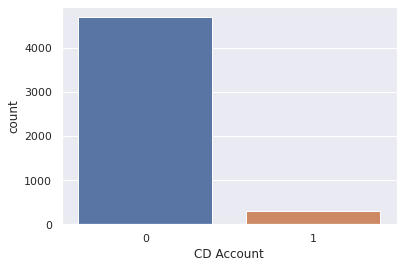

In [24]:
# Plot the Bar Graph for "CD Account", Certificate of Deposit Account
sns.countplot(data['CD Account'])

> **Observation:**  Only 302 people from 5000 peope have this account. it is only 6.04% of the total customers.



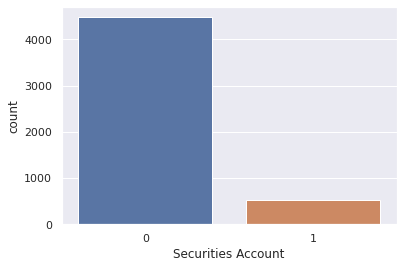

In [25]:
# Plot the Bar Graph for "Securities Account"
sns.countplot(data['Securities Account'])

> **Observation:** Only 522 people are having Security account in the bank. That is only 10.4% of total customers are having this account.

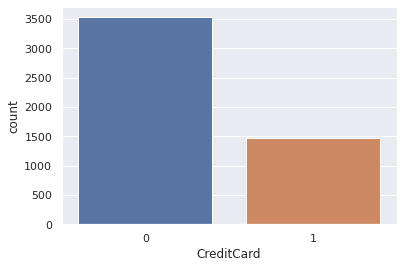

In [26]:
# Plot the Bar Graph for "Credit Card"
sns.countplot(data['CreditCard'])

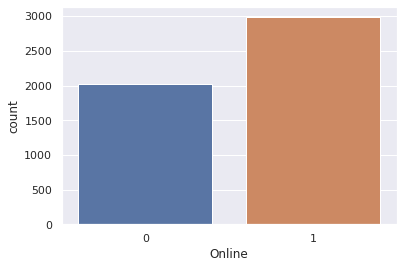

In [27]:
# Plot the Bar Graph for "Online"
sns.countplot(data['Online'])

> **Observation:** It seems many people are using online facilities provided by bank but only few are using credit cards. Around 59% people are using online facilities provided by the bank and 29% peole are using the credit card facilties.

In [28]:
data['ZIP Code'].nunique()

467

There are 467 different 'ZIP Codes' available in the Dataset. We could consider it in building model if it has 3 to 4 different 'ZIP Code'. Hence, to avoid multicollinearity, We drop the 'ZIP Code' column.

In [29]:
# Drop the 'ZIP Code' feature column
data=data.drop('ZIP Code',axis = 1)

In [30]:
data

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19.0,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15.0,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9.0,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8.0,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3.0,40,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4.0,15,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39.0,24,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40.0,49,3,0.5,2,0,0,0,0,1,0




---



---

In [31]:
# Number of people with zero mortgage
sum(data['Mortgage']==0)

3462

There are 3462 customers which has zero 'Mortgage' value.

> CCAvg is the monthly amount spend by the customer from credit card. Lets find out how many people are not using the card.

In [32]:
sum(data['CCAvg']==0)

106

There are only 106 customers use credit card on the monthly basis.

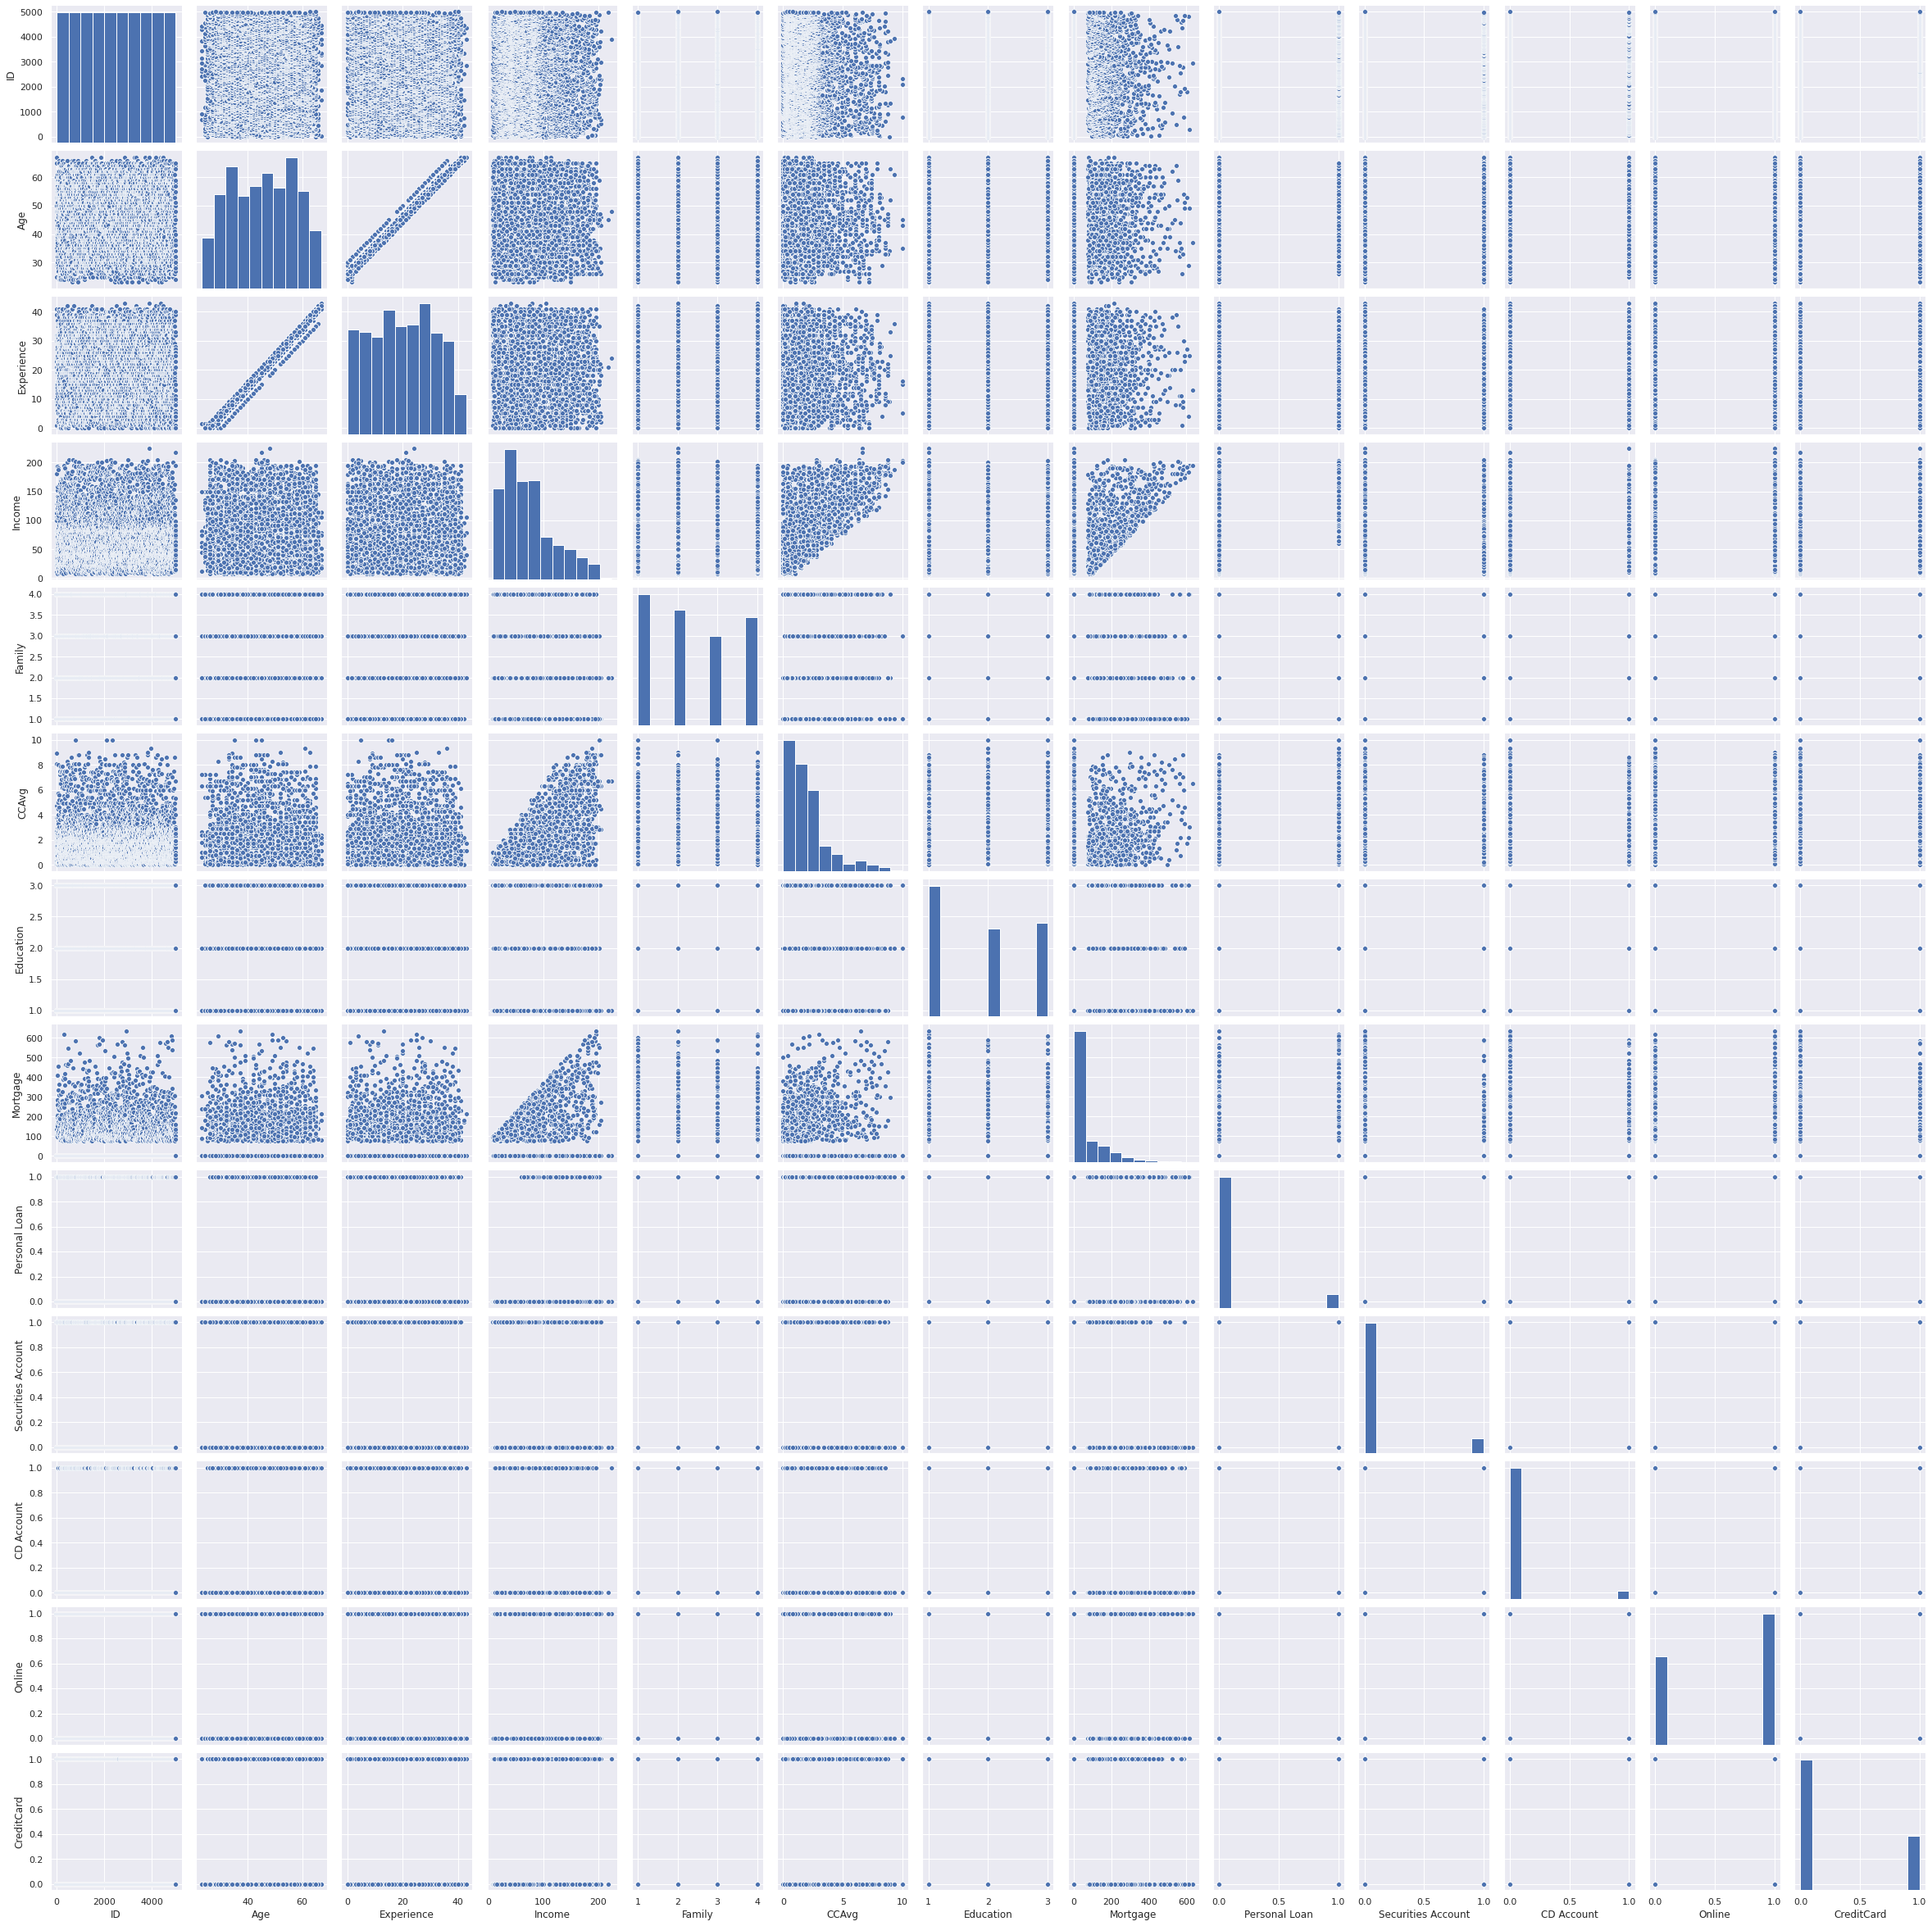

In [37]:
sns.pairplot(data)

In [38]:
sum(data.duplicated()==True)

0

There are no duplicate value present in the Dataset.

There are two types of Variables in the Dataset, Numerical & Categorical Variables:
*   Numerical Variables: Age, Experience, Income, CCAVG, Mortgage
*   Categorical Variables: Family, Education, Personal Loan, Securities Account, CD Account, Online, Credit card

Let's check what the values or group of values of each variable lies inside group that have 'Personal Loan' and don't have that.

Since we found strong association between 'Age' and 'Experience'. we can exclude 'Experience' to avoid multicollinearity.



In [39]:
data=data.drop('Experience',axis = 1)

In [40]:
# Numerical Variables
num_data = data[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].copy()

num_data.corr()

,Personal Loan,Age,Income,CCAvg,Mortgage
Personal Loan,1.000000,-0.007726,0.502462,0.366891,0.142095
Age,-0.007726,1.000000,-0.055269,-0.052030,-0.012539
Income,0.502462,-0.055269,1.000000,0.645993,0.206806
CCAvg,0.366891,-0.052030,0.645993,1.000000,0.109909
Mortgage,0.142095,-0.012539,0.206806,0.109909,1.000000


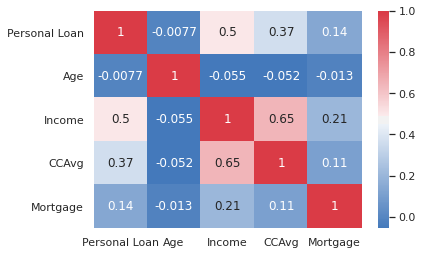

In [41]:
# Heat map
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(num_data.corr(), cmap = cmap, annot = True);

In [42]:
# get association coefficients for 'Personal Loan' and exclude it's data from series
num_data.corr()['Personal Loan'][1:]

Age        -0.007726
Income      0.502462
CCAvg       0.366891
Mortgage    0.142095
Name: Personal Loan, dtype: float64

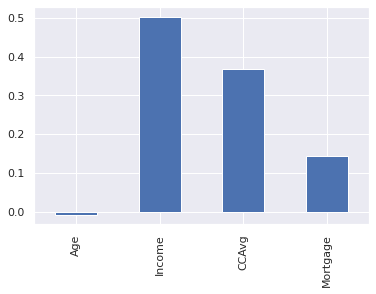

In [43]:
num_data.corr()['Personal Loan'][1:].plot.bar();

'Age' and 'Mortgage' both has very low cor.coef with Personal Loan. We may say that only 'Income' and 'CCAvg' has association with 'Personal Loan'.

> ## **Univariate Analysis**

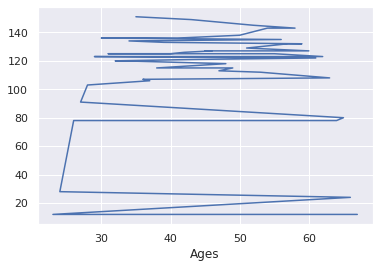

In [44]:
# Visualise the Customer Age
label = data['Age']
plt.plot(data['Age'].value_counts())
plt.xlabel('Ages')
plt.show()

In [45]:
data['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

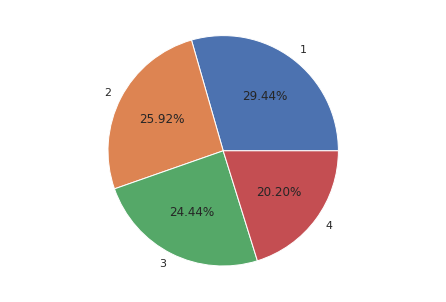

In [46]:
#Pie chart Representation of Family unique values and counts
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['1','2','3','4']
ax.pie(data['Family'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

So, maximum number of our customers live alone.

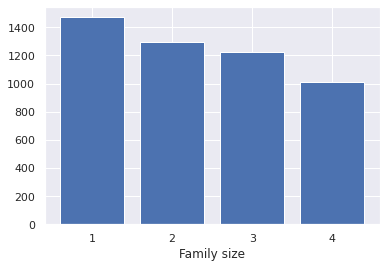

In [47]:
#Viewing this distribution in Bar Graph

plt.bar(label, data['Family'].value_counts())
plt.xlabel('Family size')
plt.show()

In [48]:
#Now seeing unique value counts of Education in which 1: Undergraduate, 2: Graduate, 3: Advanced/Professional
data['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

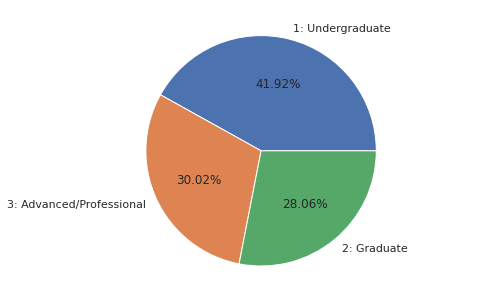

In [49]:
#Now seeing the Pie Chart of this distributuion
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['1: Undergraduate','3: Advanced/Professional','2: Graduate']
ax.pie(data['Education'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

So, maximum number of our customers are undergraduates.

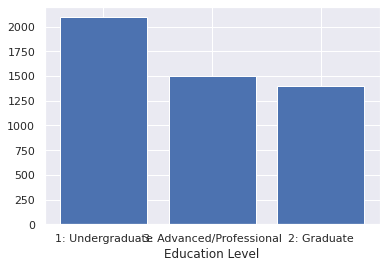

In [50]:
#Visualise the education level of customers
plt.bar(label, data['Education'].value_counts())
plt.xlabel('Education Level')
plt.show()

In [51]:
# Value Count of Personal Loan Taken by the customers (0:No, 1:Yes)
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

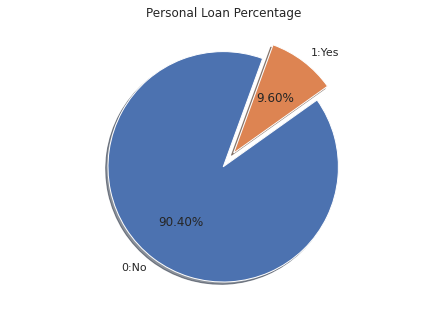

In [52]:
# The Personal Loan distribution on Pie Chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
explode=(0,0.15)
ax.axis('equal')
label = ['0:No','1:Yes']
ax.pie(data['Personal Loan'].value_counts(), explode=explode,labels=label,autopct='%1.2f%%', shadow=True, startangle=70)
plt.title('Personal Loan Percentage')
plt.show()

So, only 9.6% of the customers took loan last time.

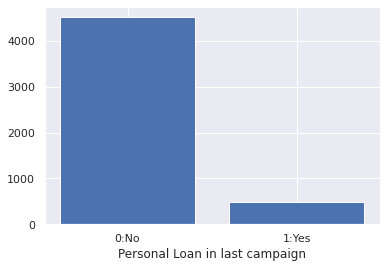

In [53]:
# Personal Loan Distribution in bar graph
plt.bar(label, data['Personal Loan'].value_counts())
plt.xlabel('Personal Loan in last campaign')
plt.show()

In [54]:
#The distribution of Whether the customer has a security account with the bank, 1:yes, 0:no
data['Securities Account'].value_counts() 

0    4478
1     522
Name: Securities Account, dtype: int64

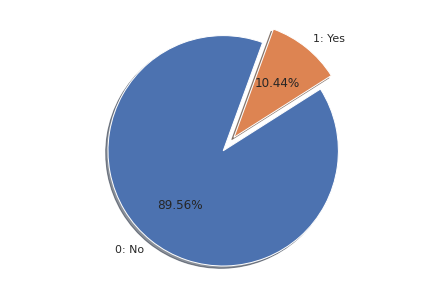

In [55]:
#Viewing Pie Chart of this distribution
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
explode=(0,0.15)
ax.axis('equal')
label = ['0: No', '1: Yes']
ax.pie(data['Securities Account'].value_counts(), explode=explode, labels=label,autopct='%1.2f%%', shadow=True,startangle=70)
plt.show()

So, only 10.44% of our customers have security accounts.

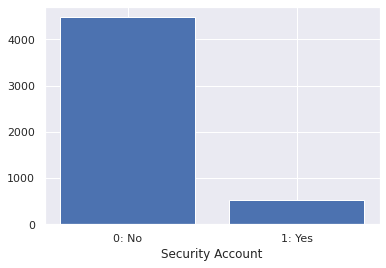

In [56]:
#Viewing the bar graph of this distribution
plt.bar(label, data['Securities Account'].value_counts())
plt.xlabel('Security Account')
plt.show()

In [57]:
#Viewing the distribution of whether the customer has a CD Account with the bank, 0:No, 1:Yes
data['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

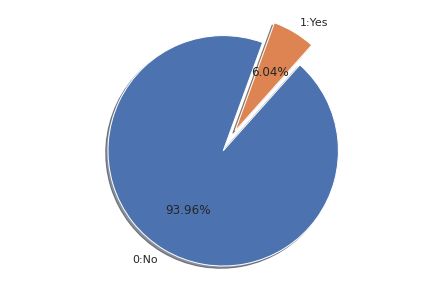

In [58]:
#Viewing the pie chart of this distribution
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
explode=(0,0.2)
ax.axis('equal')
label = ['0:No','1:Yes']
ax.pie(data['CD Account'].value_counts(),explode=explode,labels=label,autopct='%1.2f%%', shadow=True,startangle=70)
plt.show()

So, 6.04% customers have certificate of deposit accounts.

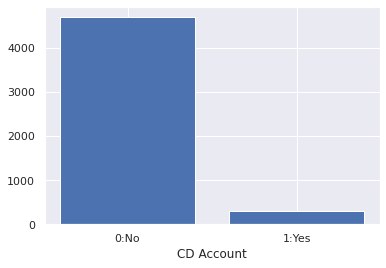

In [59]:
#Viewing the Bar Chart of this distribution
plt.bar(label,data['CD Account'].value_counts())
plt.xlabel('CD Account')
plt.show()

In [60]:
#Viewing the distribution of whether the customer uses online banking, 0:no, 1:yes
data['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

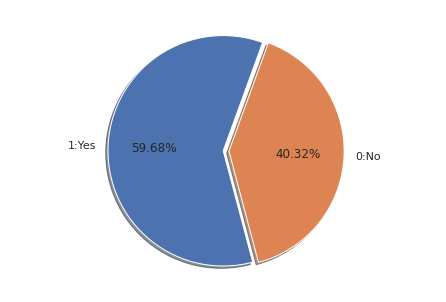

In [61]:
#Viewing the Pie Chart Representation of this data.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
explode=(0,0.05)
ax.axis('equal')
label = ['1:Yes','0:No']
ax.pie(data['Online'].value_counts(), explode=explode,labels=label,autopct='%1.2f%%', shadow=True,startangle=70)
plt.show()


So, majority of our customers i.e., 59.68% use online facilities.

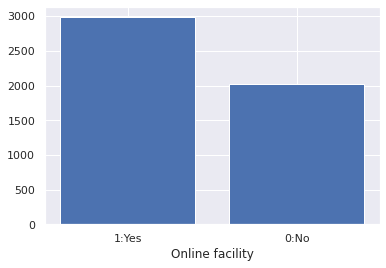

In [62]:
#Viewing the bar chart representation of this data
plt.bar(label, data['Online'].value_counts())
plt.xlabel('Online facility')
plt.show()

In [63]:
#Viewing the distribution whether a person uses a Credit Card by Universal Bank, 0:No, 1:Yes
data['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

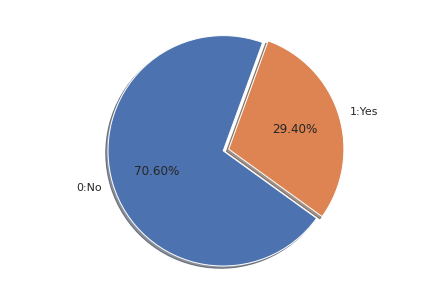

In [64]:
#Viewing the Pie Chart Representation of this data.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
explode=(0,0.05)
ax.axis('equal')
label = ['0:No','1:Yes']
ax.pie(data['CreditCard'].value_counts(),explode=explode,labels=label,autopct='%1.2f%%', shadow=True,startangle=70)
plt.show()

So, only 29.4% users have creditcard issued by Universal Bank.

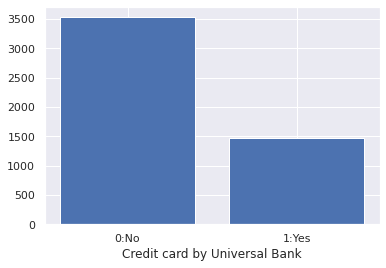

In [65]:
#Viewing Bar Chart Representation of this data
plt.bar(label, data['CreditCard'].value_counts())
plt.xlabel('Credit card by Universal Bank')
plt.show()

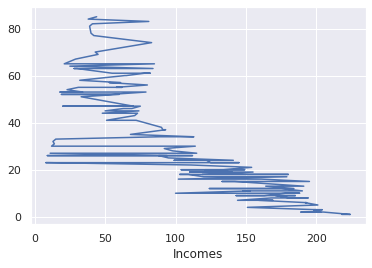

In [66]:
#Viewing the distribution related to Income through Graph
plt.plot(data['Income'].value_counts())
plt.xlabel('Incomes')
plt.show()

So, it is visible that as income increases, number of customers decrease.

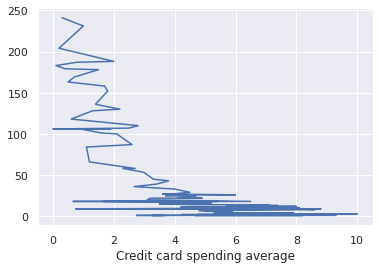

In [67]:
#Viewing the distribution related to Average Credit Card Spending per Month
plt.plot(data['CCAvg'].value_counts())
plt.xlabel('Credit card spending average')
plt.show()

So, many users have low credit card spending average per month.

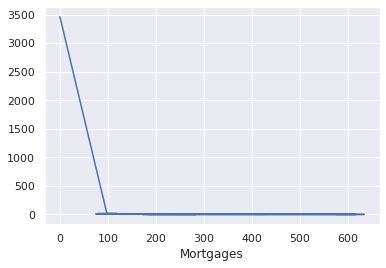

In [68]:
#Viewing the distribution of Mortgage 
plt.plot(data['Mortgage'].value_counts())
plt.xlabel('Mortgages')
plt.show()

Now, let us see the customers with zero mortgage.

In [70]:
y_mor = 0
for x_mor in data['Mortgage']:
  if x_mor == 0:
    y_mor+=1
print(y_mor)

3462


So, 3462 customers have zero mortgage.

Now, let us see number of users with zero credit card spending.

In [71]:
y_CC = 0
for x_CC in data['CCAvg']:
  if x_CC == 0:
    y_CC+=1
print(y_CC)

106


So, 106 customers have zero credit card spending average per month.

Now, that we have seen the distribution of the data, let us see the relation and analysis.

> ## **Bivariate Analysis**

In [76]:
#Extracting ID's of the customer and storing in a variable to use it for plotting with other fields
ids = data['ID']

ages = data['Age']

> **Graphical Representation of Age of the customers.**

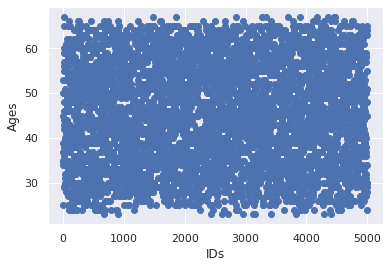

In [77]:

#Plotting Scatter Plot
plt.scatter(ids,ages)
plt.xlabel('IDs')
plt.ylabel('Ages')
plt.show()

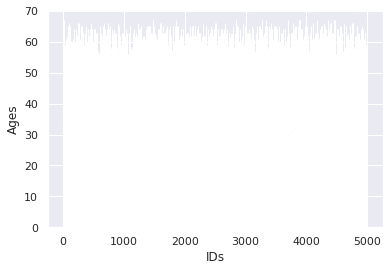

In [79]:
#Plotting Bar Graph
plt.bar(ids,ages)
plt.xlabel('IDs')
plt.ylabel('Ages')
plt.show()

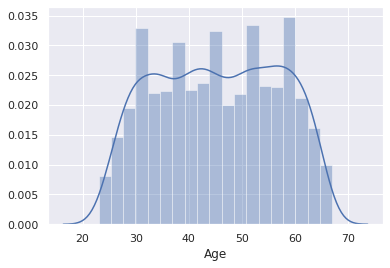

In [80]:
#Plotting variance of age
sns.distplot(ages)
plt.show()

It seems a normal curve.

> Graphical Representation of incomes of customers

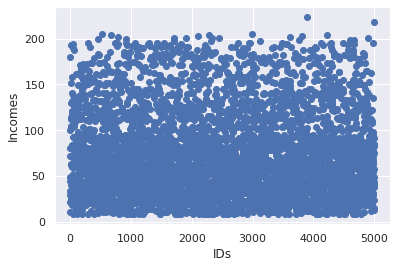

In [81]:
#Extracting the incomes of customers and saving it to a variable.
incomes = data['Income']

#Plotting Scatter Plot
plt.scatter(ids, incomes)
plt.xlabel('IDs')
plt.ylabel('Incomes')
plt.show()

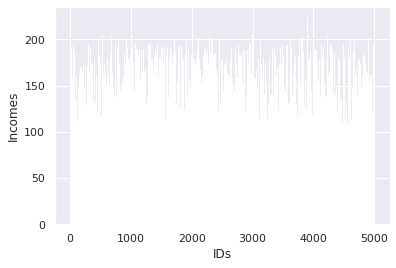

In [82]:
#Plotting the Bar Graph
plt.bar(ids, incomes)
plt.xlabel('IDs')
plt.ylabel('Incomes')
plt.show()

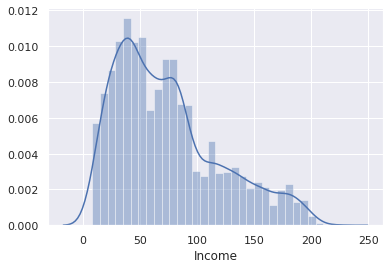

In [83]:
#Variance of incomes
sns.distplot(incomes)
plt.show()

So, it seems to be skewed.

> **Graphical Representation of the Family size**

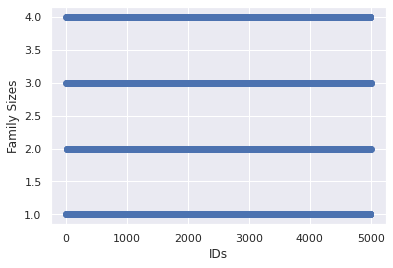

In [85]:
#Extracting Family members and saving to a variable.
families = data['Family']

#Plotting Scatter Plot
plt.scatter(ids, families)
plt.xlabel('IDs')
plt.ylabel('Family Sizes')
plt.show()

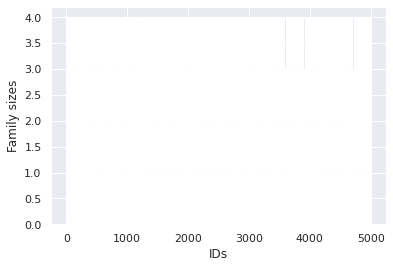

In [86]:
#Plotting Bar Graph
plt.bar(ids, families)
plt.xlabel('IDs')
plt.ylabel('Family sizes')
plt.show() 

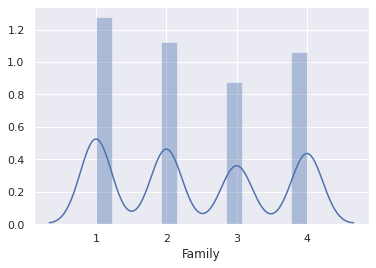

In [87]:
#Variance
sns.distplot(families)
plt.show()

> **Graphical Representation of Average spendings of customers monthly using credit card**

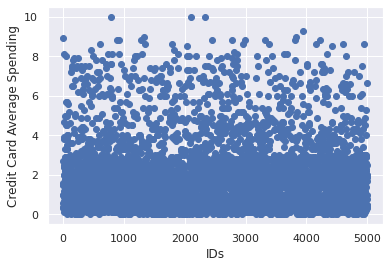

In [88]:
#Extracting the values to a variable.
ccavgs = data['CCAvg']

#Plotting Scatter Plot
plt.scatter(ids, ccavgs)
plt.xlabel('IDs')
plt.ylabel('Credit Card Average Spending')
plt.show()

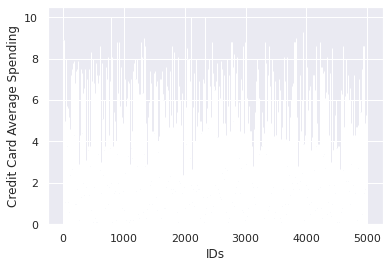

In [89]:
#Plotting Bar Graph
plt.bar(ids, ccavgs)
plt.xlabel('IDs')
plt.ylabel('Credit Card Average Spending')
plt.show()

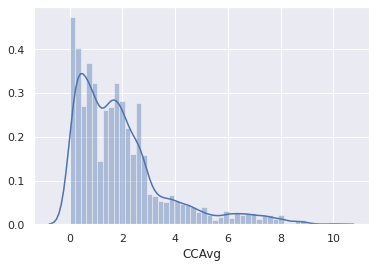

In [90]:
sns.distplot(ccavgs)
plt.show()

*It* too appears skewed.

> **Education levels**

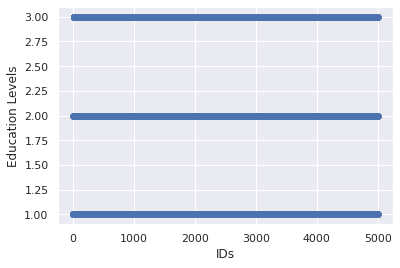

In [91]:
#Extracting Education levels and storing in a variable
educations = data['Education']

plt.scatter(ids,educations)
plt.xlabel('IDs')
plt.ylabel('Education Levels')
plt.show()

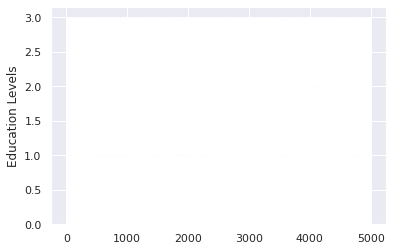

In [92]:
plt.bar(ids,educations)
plt.ylabel('Education Levels')
plt.show()

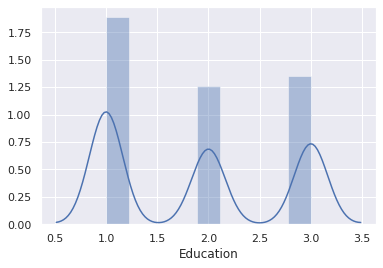

In [93]:
sns.distplot(educations)
plt.show()

> **Mortgages**

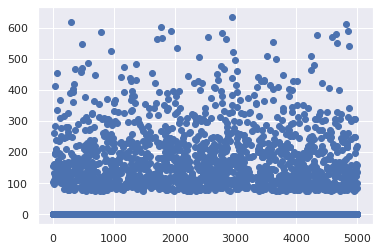

In [94]:
#Extracting mortgages and saving in a variable
mortgages = data['Mortgage']

plt.scatter(ids, mortgages)
plt.show()

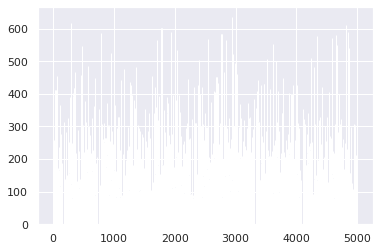

In [95]:
plt.bar(ids,mortgages)
plt.show()

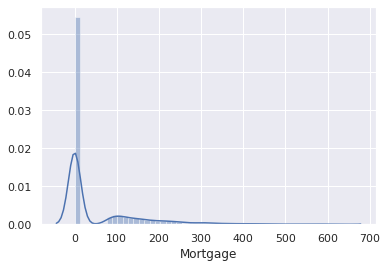

In [96]:
sns.distplot(mortgages)
plt.show()

> **Personal Loan**

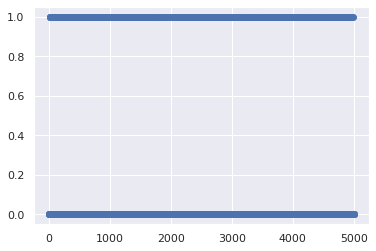

In [97]:
#Extracting whether the person took a loan to a variable
loans= data['Personal Loan']

plt.scatter(ids,loans)
plt.show()

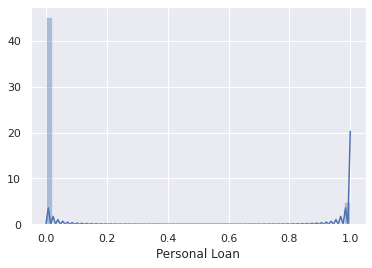

In [98]:
sns.distplot(loans)
plt.show()

> **Security account**

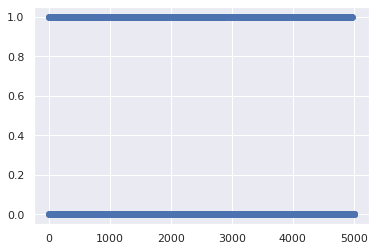

In [99]:
#Extracting whether person has security account with bank to a variable
securities = data['Securities Account']

plt.scatter(ids,securities)
plt.show()

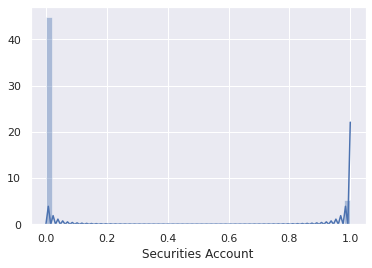

In [100]:
sns.distplot(securities)
plt.show()

> **CD Account**

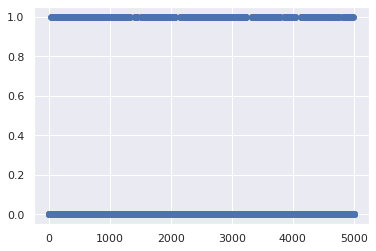

In [101]:
#Extracting whether customer has CD Account or not to a variable
cdaccs= data['CD Account']

plt.scatter(ids, cdaccs)
plt.show()

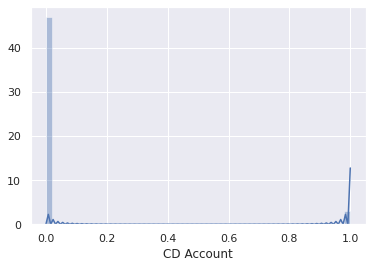

In [102]:
sns.distplot(cdaccs)
plt.show()

> **Online Facility**

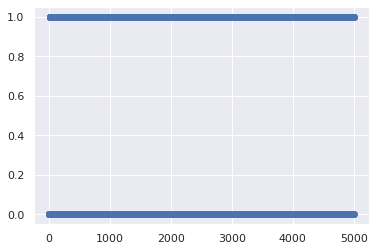

In [103]:
#Extracting whether customer uses online facilities to a variable
onlines = data['Online']

plt.scatter(ids,onlines)
plt.show()

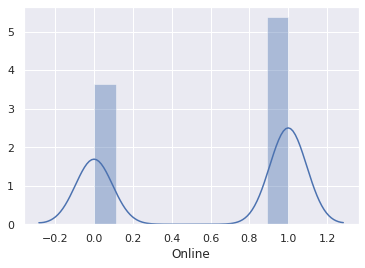

In [104]:
sns.distplot(onlines)
plt.show()

> **Credit card**

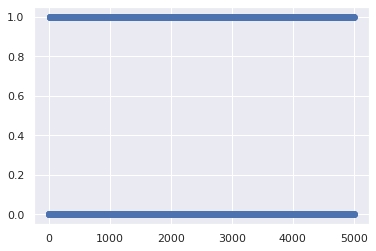

In [105]:
#Extracting whether user has Credit Card issued by Universal Bank
creditcards = data['CreditCard']

plt.scatter(ids,creditcards)
plt.show()

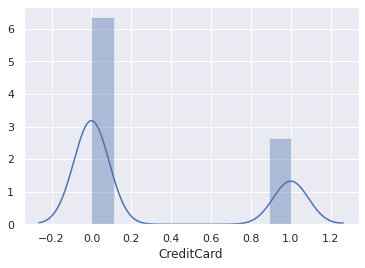

In [106]:
sns.distplot(creditcards)
plt.show()

Based on the above observations, we can conclude that certain fields need to be processed before use.



Now, let us see the relational graphs between variables which may be related.

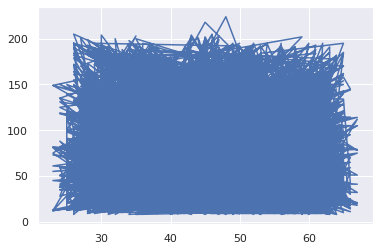

In [107]:
#Relation between age and income
plt.plot(ages,incomes)
plt.show()

So, it is clear that they are not related.

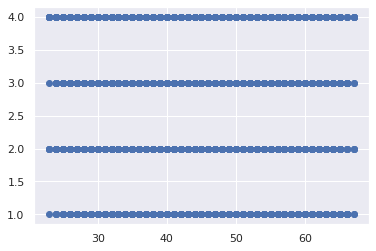

In [108]:
#Relation between age and family size
plt.scatter(ages,families)
plt.show()

They too are not related.

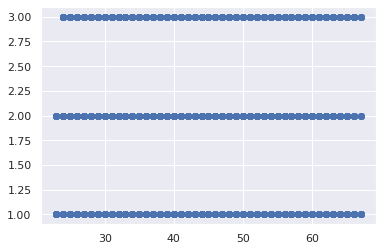

In [109]:
#Relation between age and education
plt.scatter(ages,educations)
plt.show()

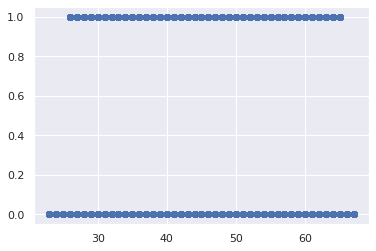

In [110]:
#Relation between Age and Personal Loan
plt.scatter(ages,loans)
plt.show()

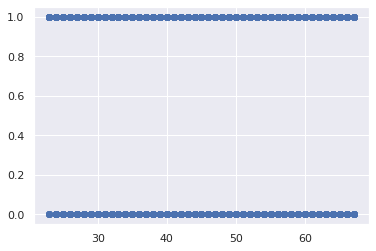

In [111]:
#Relation between Age and Online facilities
plt.scatter(ages,onlines)
plt.show()

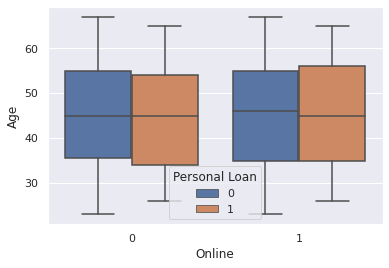

In [112]:
sns.boxplot(x='Online', y='Age',hue='Personal Loan',data=data)
plt.show()

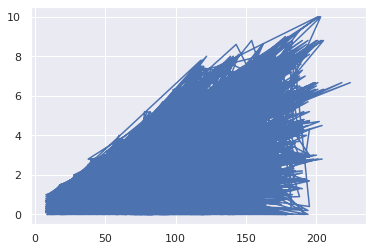

In [113]:
#Relation between Income and Average spending
plt.plot(incomes,ccavgs)
plt.show()

They seem to be related to some extent.

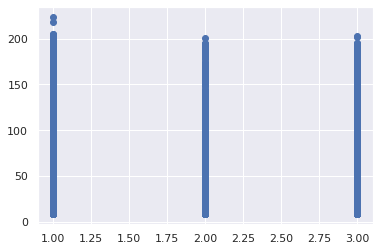

In [114]:
#Relation between Income and Education
plt.scatter(educations,incomes)
plt.show()

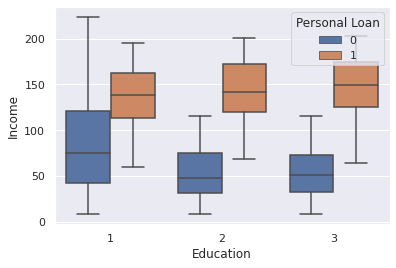

In [115]:
sns.boxplot(x='Education', y='Income',hue='Personal Loan',data=data)
plt.show()

So, it is visible that people with high education and high income tend to be more probable in taking loan.

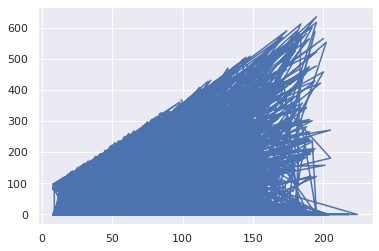

In [116]:
#Relation between Income and Mortgage value
plt.plot(incomes,mortgages)
plt.show()

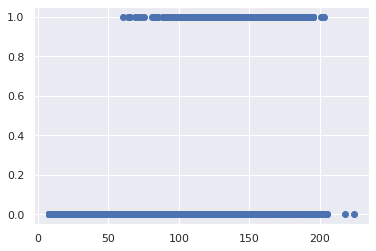

In [117]:
#Relation between Income and Personal Loan
plt.scatter(incomes,loans)
plt.show()

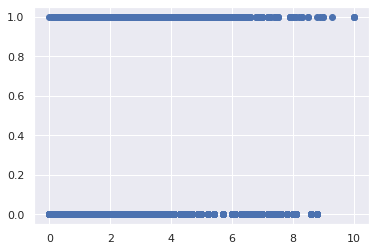

In [119]:
#Relation between average credit card spending per month and loan
plt.scatter(ccavgs,loans)
plt.show()

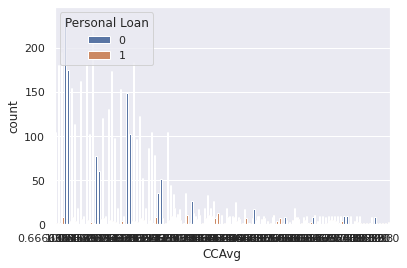

In [120]:
sns.countplot(x='CCAvg',hue='Personal Loan',data=data)
plt.show()

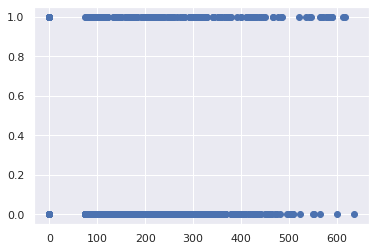

In [121]:
#Relation between mortgages and loan
plt.scatter(mortgages,loans)
plt.show()

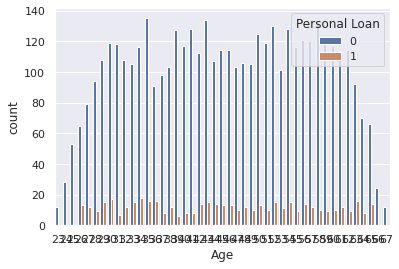

In [122]:
#Relation between Ages and loans
sns.countplot(x='Age',hue='Personal Loan',data=data)
plt.show()

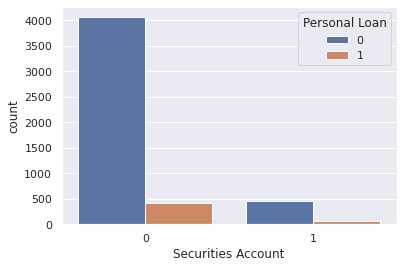

In [123]:
#Relation between security account and Loan
sns.countplot(x='Securities Account',hue='Personal Loan',data=data)
plt.show()

It is visible that people with security accounts tend less to take loans.

Now, let us plot the correlations plot between variables to check correlativity which we may have not been able to identify.

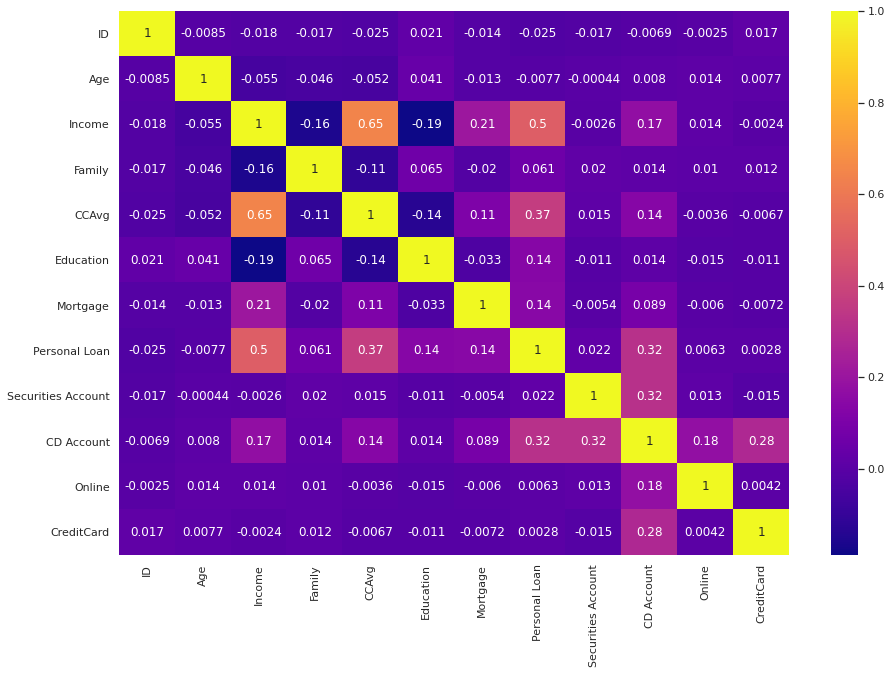

In [124]:
#Correlations Plot
fig.ax=plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),cmap='plasma',annot=True)
plt.show()

It is visible that none of our variables except income and Credit card average are much correlated.

So, we have seen relations between various datas.



---



---



---



# Applying necessary transformations for the feature variables

> Customers ID is just a number to discriminate from one to others. It doesn't contain any interesting fact. So, We can drop the 'ID' Column.

In [125]:
#Dropping ID's
data = data.drop(['ID'], axis=1)
data

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


Now, that our data has been gotten rid of less useful fields, let us proceed further and also let us apply various transformations.

> ## **Extracting Target and Training Variable**

Now, let us extract Training variable (X) and Target Variable (Y)

In [126]:
X=data.loc[:,data.columns != 'Personal Loan']
Y=data[['Personal Loan']]


In [127]:
X

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,1,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,1,0


In [128]:
Y

,Personal Loan
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


> ## **Normalization of Dataset**

Now, that we have preprocessed the data, it requires to be normalized which means to covert the data into its equivalent form of normal data so that it increases the accuracy of our predictions. 
I tried boxcox and yeo-johnson method of normalization and found the latter to be better. Hence, we will be using it. And we will be using label encoding on Mortgage to transform it as it seems highly skewed.

In [129]:
#Normalising Income
from sklearn.preprocessing import PowerTransformer
pt_inc = PowerTransformer(method='yeo-johnson',standardize=False)
pt_inc.fit(X['Income'].values.reshape(-1,1))
temp_Inc = pt_inc.transform(X['Income'].values.reshape(-1,1))
X['Income'] = temp_Inc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


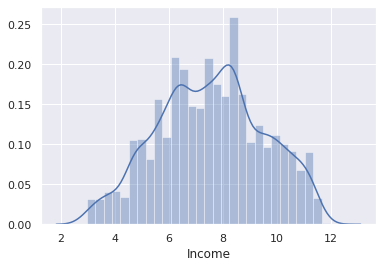

In [130]:
sns.distplot(X['Income'])
plt.show()

Now, Income does look normalized and ready for use.

In [131]:
#Normalizing Credit Card Average
pt_cc = PowerTransformer(method='yeo-johnson',standardize=False)
pt_cc.fit(X['CCAvg'].values.reshape(-1,1))
temp_CC = pt_cc.transform(X['CCAvg'].values.reshape(-1,1))
X['CCAvg']=temp_CC

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


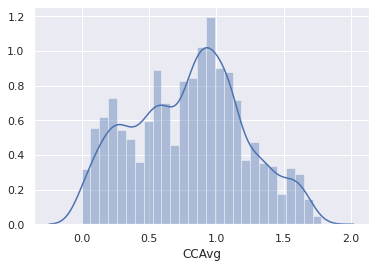

In [132]:
sns.distplot(X['CCAvg'])
plt.show()

Now, it too looks normalized and ready for use.

In [133]:
#Transforming Mortgage through Label Encoding
X['Mortgage_New']=pd.cut(X['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
X.drop(['Mortgage'], axis=1, inplace=True)

In [134]:
X.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_New
0,25,6.827583,4,0.845150,1,1,0,0,0,0
1,45,5.876952,3,0.814468,1,1,0,0,0,0
2,39,3.504287,1,0.633771,1,0,0,0,0,0
3,35,8.983393,1,1.107409,2,0,0,0,0,0
4,35,6.597314,4,0.633771,2,0,0,0,1,0


So now, Our data seems ready for use for predictions. So, let us proceed.

> ## **Splitting the dataset into training and test set**

In [135]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.3, stratify=Y, random_state=0)

In [136]:
X_train

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_New
3789,51,5.058173,3,0.322048,1,0,0,1,1,0
758,64,5.948841,1,0.814468,2,1,0,0,0,0
2868,52,5.651776,4,0.902268,1,0,0,1,1,0
2550,32,4.661500,1,0.384643,3,0,0,1,0,1
2150,62,7.097040,1,0.544705,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
3597,56,6.937650,3,0.954454,3,0,0,1,0,0
4670,52,11.394571,1,0.874376,1,0,0,1,0,0
988,63,5.728502,1,0.928929,2,0,0,0,0,0
2037,35,6.991517,2,0.633771,2,0,0,0,1,0


In [137]:
X_test

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_New
9,34,11.100150,1,1.722778,3,0,0,0,0,0
461,55,8.302424,2,1.271913,1,1,0,0,0,0
3700,48,9.831967,1,1.497486,1,1,0,0,0,0
1559,59,9.049404,4,1.162156,2,0,0,1,0,1
4558,44,8.341020,2,0.322048,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
2180,58,6.414718,2,0.845150,3,0,0,1,0,0
3484,45,7.044639,3,1.067696,2,0,0,0,0,1
2965,53,5.651776,2,0.322048,3,0,0,0,1,1
2493,34,6.827583,1,1.067696,3,0,0,0,0,0


In [138]:
Y_train

,Personal Loan
3789,0
758,0
2868,0
2550,0
2150,0
...,...
3597,0
4670,0
988,0
2037,0


In [139]:
Y_test

,Personal Loan
9,1
461,0
3700,0
1559,1
4558,0
...,...
2180,0
3484,0
2965,0
2493,0


So, now our data has been split into training and test set which means we are good to go ahead.

> ## **Scaling the Dataset**

Now, that our data has been normalized and split into training and test sets, let us scale the data which in turn makes it easier for our model to understand it.

In [140]:
from sklearn.preprocessing import StandardScaler
sc_x_train = StandardScaler()
sc_x_train.fit_transform(X_train)

sc_x_test = StandardScaler()
sc_x_test.fit_transform(X_test)

array([[-1.02896547,  1.80508985, -1.21572118, ..., -1.27552743,
        -0.62567218, -0.48867186],
       [ 0.80680777,  0.36499165, -0.34899981, ..., -1.27552743,
        -0.62567218, -0.48867186],
       [ 0.19488336,  1.15230694, -1.21572118, ..., -1.27552743,
        -0.62567218, -0.48867186],
       ...,
       [ 0.63197222, -0.9994004 , -0.34899981, ..., -1.27552743,
         1.59828107,  0.68979725],
       [-1.02896547, -0.39416694, -1.21572118, ..., -1.27552743,
        -0.62567218, -0.48867186],
       [-0.06736996, -0.15105953,  0.51772157, ...,  0.78398941,
        -0.62567218, -0.48867186]])

# **Logistic Regression Model**

Now, we will be building Logistic regression model which predicts the result on basis of a threshold value on whose basis it classifies the data and make predictions. 

In [141]:
#Building Logistic Regression Model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0,max_iter=300)

In [142]:
#Fitting the data
log_reg.fit(X_train,Y_train['Personal Loan'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [143]:
#Making the predictions
Y_pred_LR = log_reg.predict(X_test)

In [144]:
#Accuracy Score of test set
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
acc_LR = accuracy_score(Y_pred_LR,Y_test)
acc_LR

0.9546666666666667

In [145]:
#Accuracy Score of training set
Y_pred_LR_train = log_reg.predict(X_train)
acc_LR_train = accuracy_score(Y_pred_LR_train, Y_train)
acc_LR_train

0.956

We have checked accuracy scores of Training and Test set because it shows us whether overfitting is present or not. And since, the values are quite close. Hence, they are not overfitted.

Accuracy score may not be a very reliable method in our case to identify our predictions. So, we will also be calculating roc score and other metrics measures.

Let us see the confusion matrix of our predictions first.

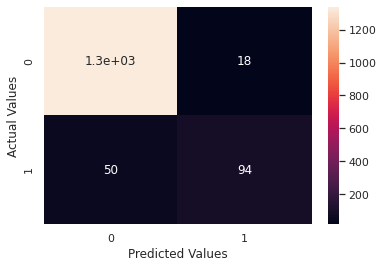

In [146]:
cm = confusion_matrix(Y_test, Y_pred_LR)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

Though, it works fine. But, it has one problem that 53 of the values predicted by the model as false are actually true which means we will be losing the chance of contacting those customers. So, we will however also be looking at other models and hence, find a better model.

In [147]:
#Precision score
Pr_sc_LR = precision_score(Y_test, Y_pred_LR)
Pr_sc_LR

0.8392857142857143

So, it is pretty well precision score but again other models may possess more.

In [148]:
#Recall score
Rs_LR = recall_score(Y_test,Y_pred_LR)
Rs_LR

0.6527777777777778

In [149]:
#F1 score
F1_LR = f1_score(Y_test,Y_pred_LR)
F1_LR

0.734375

In [150]:
#Roc Area under curve score
R_Ar_LR = roc_auc_score(Y_test,Y_pred_LR)
R_Ar_LR

0.819751720747296

These values are fine but we will look for better models.

---



---



---



# **Building Other Models**

> ### **Perceptron Model**

It is a very basic model based on linear method which is also used to classify results.

In [151]:
#Building model
from sklearn.linear_model import Perceptron
perce = Perceptron(random_state=0)

In [152]:
#Fitting the model with training set
perce.fit(X_train,Y_train['Personal Loan'])

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [153]:
#Predicting the model with test set
Y_pred_P = perce.predict(X_test)

In [154]:
#Accuracy score of test set
acc_P = accuracy_score(Y_test,Y_pred_P)
acc_P

0.9173333333333333

In [155]:
#Accuracy of training set
Y_pred_P_train = perce.predict(X_train)
acc_P_train = accuracy_score(Y_train,Y_pred_P_train)
acc_P_train

0.9131428571428571

So, it is clear that data is not overfitted.

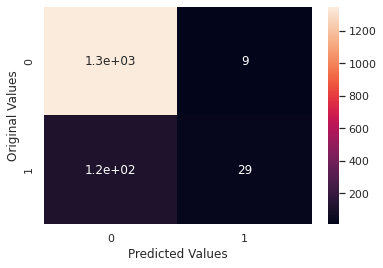

In [156]:
#Confusion Matrix
cm = confusion_matrix(Y_test,Y_pred_P)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.show()

So, it is predicting a lot of values as false which our actually true so it is not much reliable and it would be much better to choose other models.

In [157]:
#Precision score
Pr_sc_P = precision_score(Y_test,Y_pred_P)
Pr_sc_P

0.7631578947368421

In [158]:
#F1 score
F1_P = f1_score(Y_test,Y_pred_P)
F1_P

0.31868131868131866

In [159]:
#Recall score
Rs_P = recall_score(Y_test,Y_pred_P)
Rs_P

0.2013888888888889

In [160]:
#ROC area under the curve score
R_Ar_P = roc_auc_score(Y_test,Y_pred_P)
R_Ar_P

0.597375860373648

So, it does not seem a relaible method in our case. So, it would be better to use other model over perceptron in this case.

> ### **Gaussian Naive Bayes Model**

Gaussian Naive Bayes is a good method of classification.

In [161]:
#Building the model
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

In [162]:
#Fitting training set to the model
GNB.fit(X_train, Y_train['Personal Loan'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [163]:
#Predicting results with test set
Y_pred_GNB = GNB.predict(X_test)

In [164]:
#Accuracy score of test set
acc_GNB = accuracy_score(Y_test,Y_pred_GNB)
acc_GNB

0.9133333333333333

In [165]:
#Accuracy score of training set
Y_pred_GNB_train = GNB.predict(X_train)
acc_GNB_train = accuracy_score(Y_train, Y_pred_GNB_train)
acc_GNB_train

0.9085714285714286

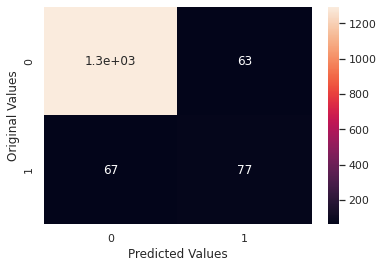

In [168]:
#Confusion Matrix
cm = confusion_matrix(Y_test,Y_pred_GNB)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.show()

Again, its leaving 67 actually true customers as false which means we still need a better model.

In [169]:
#Precision Score
Pr_sc_GNB = precision_score(Y_test,Y_pred_GNB)
Pr_sc_GNB

0.55

In [170]:
#Recall Score
Rs_GNB = recall_score(Y_test, Y_pred_GNB)
Rs_GNB

0.5347222222222222

In [171]:
#F1 Score
F1_GNB = f1_score(Y_test,Y_pred_GNB)
F1_GNB

0.5422535211267606

In [172]:
#ROC Area under the curve score
R_Ar_GNB = roc_auc_score(Y_test,Y_pred_GNB)
R_Ar_GNB

0.7441310226155359

So, it performs better than Perceptron model but still there is scope of improvement. So, let us continue our search for the best model.

> ### **Decision Tree Classifier Model**

Decision Tree classifier is a model in which it takes decision on basis of certain criterias.
For setting the maximum depth upto which the model must go, I tested with various values and found 7 to be the best.

In [173]:
#Building the model
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=0, max_depth=7)

In [174]:
#Fitting the training set into the model
DTC.fit(X_train,Y_train['Personal Loan'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Let us see what conditions our computer has laid for making the predictions.

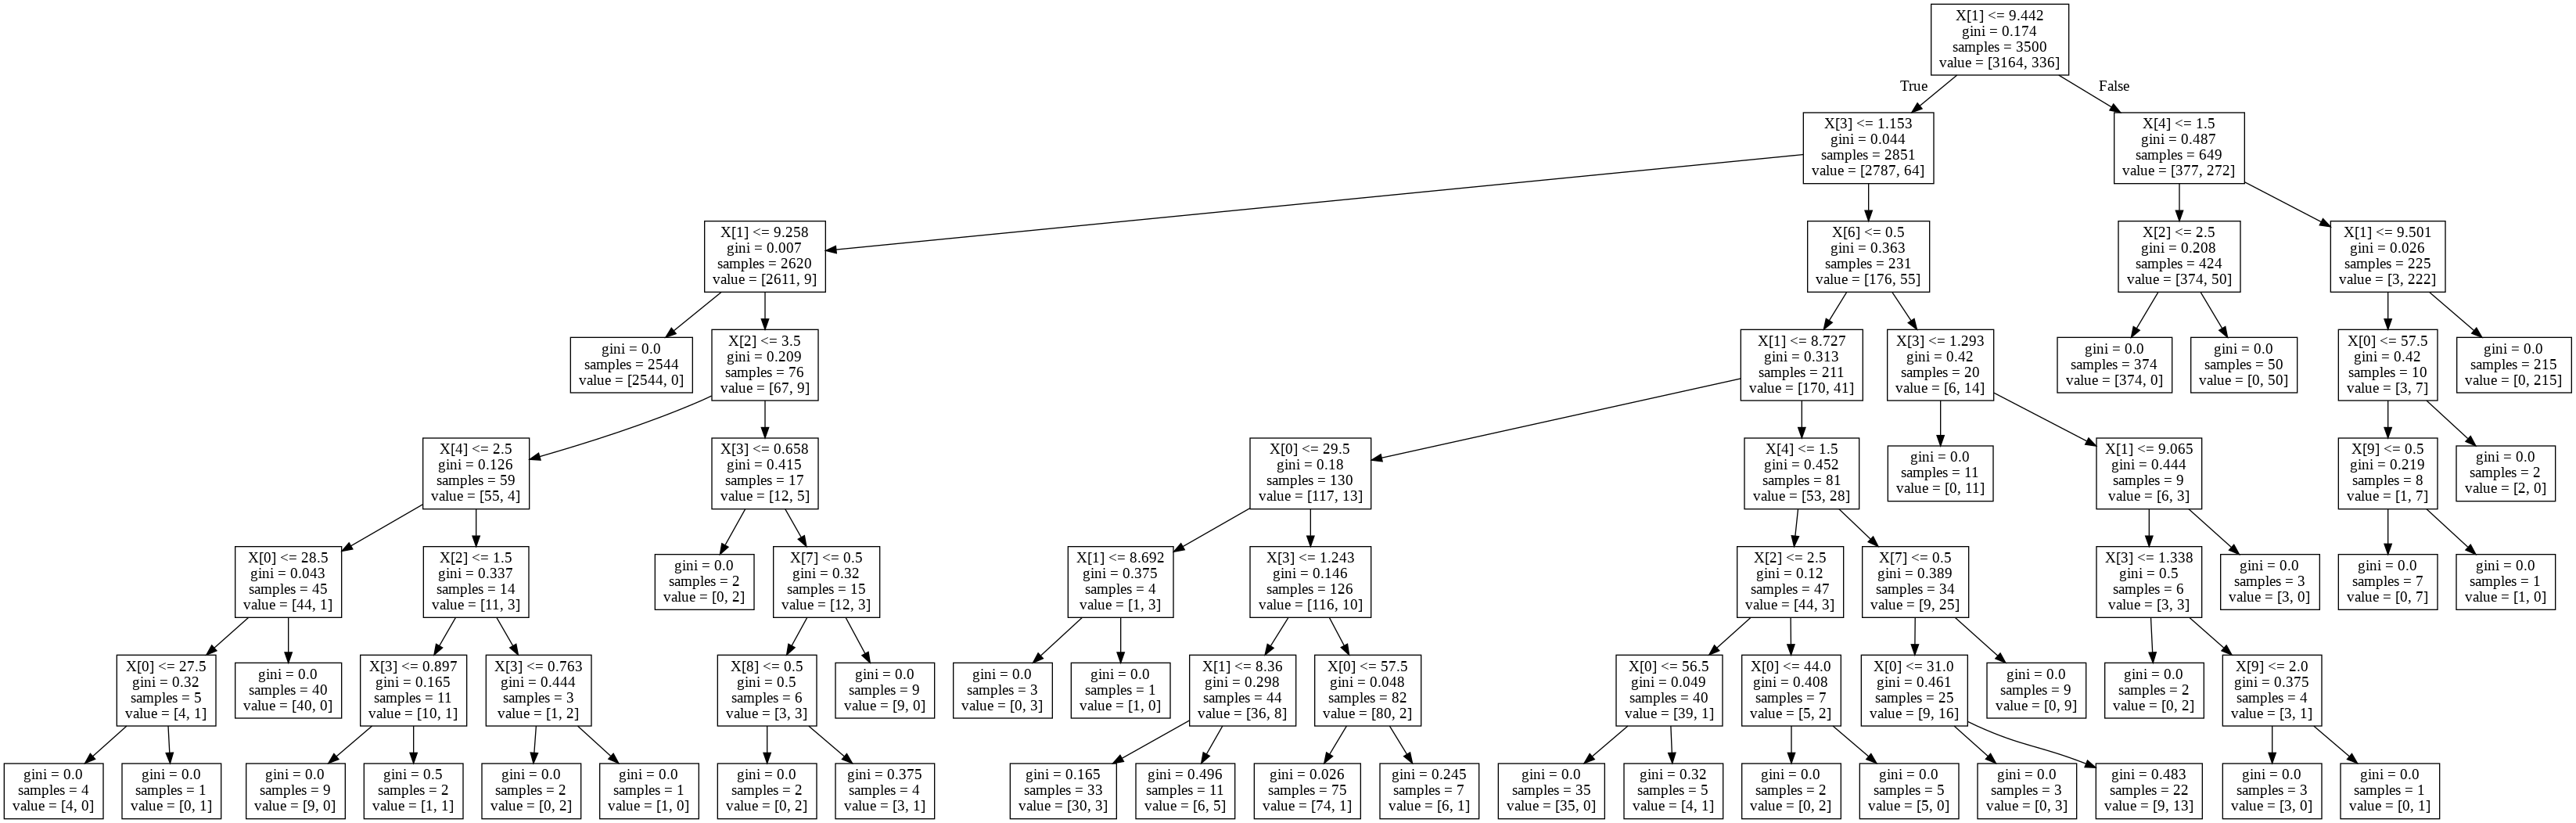

In [175]:
#Dotting the Graph
from sklearn import tree
dot_data=tree.export_graphviz(DTC,out_file=None)

#Drawing the graph
import pydotplus as pdp
from IPython.display import Image
graph = pdp.graph_from_dot_data(dot_data)
Image(graph.create_png())

So, this is the logic which our machine has learnt. You may zoom the image by double clicking and see if you want to.

In [176]:
#Predicting the results with test set
Y_pred_DTC=DTC.predict(X_test)

In [177]:
#Accuracy score of test set
acc_DTC = accuracy_score(Y_test,Y_pred_DTC)
acc_DTC

0.982

In [178]:
#Accuracy score of training set
y_pred_DTC_train = DTC.predict(X_train)
acc_DTC_train = accuracy_score(Y_train,y_pred_DTC_train)
acc_DTC_train

0.9937142857142857

So, its probably predicting quite well.

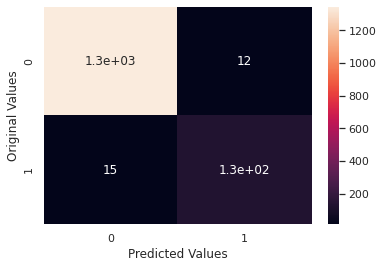

In [179]:
#Confusion Matrix
cm =confusion_matrix(Y_test,Y_pred_DTC)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.show()

So, it's working out quite well as it has reduced number of False negative to 15.

In [180]:
#Precision Score
Pr_sc_DTC = precision_score(Y_test,Y_pred_DTC)
Pr_sc_DTC

0.9148936170212766

In [181]:
#Recall Score
Rs_DTC = recall_score(Y_test,Y_pred_DTC)
Rs_DTC

0.8958333333333334

In [182]:
#F1 Score
F1_DTC = f1_score(Y_test,Y_pred_DTC)
F1_DTC

0.9052631578947369

In [183]:
#ROC Area under the curve score
R_Ar_DTC = roc_auc_score(Y_test,Y_pred_DTC)
R_Ar_DTC

0.9434918879056048

So, this is working quite well and much better than previous models. But, let us still continue our hunt, maybe we will end up getting something better.

> ### **K-Nearest Neighbour Classifier Model**

KNN Classifier works on the basis of nearest distance and nearest neighbours and hence classifying the data into subgroups which results in predictions. 
I tried various values of K i.e., n_neighbors and found 5 to be the most suitable in this case.

In [184]:
#Building the model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)

In [185]:
#Fitting the model with training set
KNN.fit(X_train,Y_train['Personal Loan'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [186]:
#Making predictions with test set
Y_pred_KNN=KNN.predict(X_test)

In [187]:
#Accuracy of test set
acc_KNN = accuracy_score(Y_test,Y_pred_KNN)
acc_KNN

0.962

In [188]:
#Accuracy of training set
Y_pred_KNN_train = KNN.predict(X_train)
acc_KNN_train = accuracy_score(Y_train,Y_pred_KNN_train)
acc_KNN_train

0.9651428571428572

It too seems to work well.

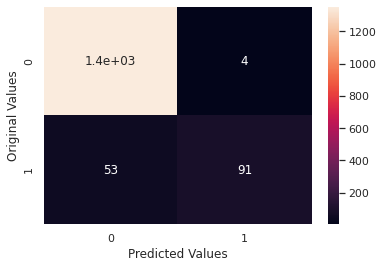

In [189]:
#Confusion Matrix
cm = confusion_matrix(Y_test,Y_pred_KNN)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.show()

It may be having high accuracy but it has 53 such values which are actually true but it predicted them as false. So, we need to choose a better model which works better in our case.

In [190]:
#Precision Score
Pr_sc_KNN = precision_score(Y_test, Y_pred_KNN)
Pr_sc_KNN

0.9578947368421052

In [191]:
#Recall Score
Rs_KNN = recall_score(Y_test,Y_pred_KNN)
Rs_KNN

0.6319444444444444

In [192]:
#F1 Score
F1_KNN = f1_score(Y_test,Y_pred_KNN)
F1_KNN

0.7615062761506275

In [193]:
#ROC Area under the curve score
R_Ar_KNN = roc_auc_score(Y_test,Y_pred_KNN)
R_Ar_KNN

0.8144972959685348

So, it may be working well but it does not suit much to our case.

> ### **Neural Networks Classifier - MLP Classifier**

It is a classifier which is a step towards AI. In this we will be using Multi - Linear Perceptron(MLP) Classifier.

In [194]:
#Building the model
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(random_state=0,max_iter=300)

In [195]:
#Fitting the Model with training set
MLP.fit(X_train,Y_train['Personal Loan'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [196]:
#Predicting the results with test set
Y_pred_MLP=MLP.predict(X_test)

In [197]:
#Accuracy of test set
acc_MLP = accuracy_score(Y_test,Y_pred_MLP)
acc_MLP

0.9773333333333334

In [198]:
#Accuracy of training set
Y_pred_MLP_train = MLP.predict(X_train)
acc_MLP_train = accuracy_score(Y_train,Y_pred_MLP_train)
acc_MLP_train

0.9791428571428571

So, it seems to be working quite well.

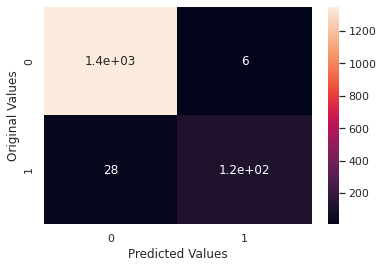

In [199]:
#Confusion Matrix
cm = confusion_matrix(Y_test,Y_pred_MLP)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.show()

So, it is working well but it has 28 False negative values.

In [200]:
#Precision Score
Pr_sc_MLP = precision_score(Y_test,Y_pred_MLP)
Pr_sc_MLP

0.9508196721311475

In [201]:
#Recall Score
Rs_MLP = recall_score(Y_test, Y_pred_MLP)
Rs_MLP

0.8055555555555556

In [202]:
#F1 Score
F1_MLP = f1_score(Y_test,Y_pred_MLP)
F1_MLP

0.8721804511278195

In [203]:
#ROC Area under the curve score
R_Ar_MLP = roc_auc_score(Y_test,Y_pred_MLP)
R_Ar_MLP

0.9005653883972468

It is working well but still there maybe some models working better.

> ### **Support Vector Machine Classifier Model**

They are supervised learning models which are used to predict results.

In [204]:
#Building the model
from sklearn.svm import SVC
SVM = SVC(random_state=0,gamma='auto')

In [205]:
#Fitting the model with Training set
SVM.fit(X_train,Y_train['Personal Loan'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [206]:
#Predicting the results with Test set
Y_pred_SVM=SVM.predict(X_test)

In [207]:
#Accuracy Score of test set
acc_SVM = accuracy_score(Y_test,Y_pred_SVM)
acc_SVM

0.9726666666666667

In [208]:
#Accuracy Score of training set
Y_pred_SVM_train = SVM.predict(X_train)
acc_SVM_train = accuracy_score(Y_train,Y_pred_SVM_train)
acc_SVM_train

0.9771428571428571

It is predicting well.

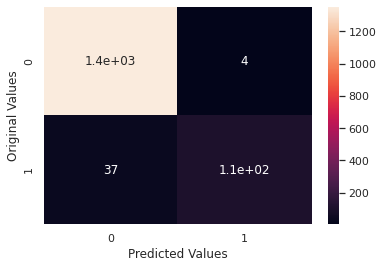

In [209]:
#Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred_SVM)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.show()

So, it is predicting well but it has 37 False negatives.

In [210]:
#Precision Score
Pr_sc_SVM = precision_score(Y_test,Y_pred_SVM)
Pr_sc_SVM

0.963963963963964

In [211]:
#Recall Score
Rs_SVM=recall_score(Y_test,Y_pred_SVM)
Rs_SVM

0.7430555555555556

In [212]:
#F1 Score
F1_SVM=f1_score(Y_test,Y_pred_SVM)
F1_SVM

0.8392156862745098

In [213]:
#ROC Area under the curve Score
R_Ar_SVM=roc_auc_score(Y_test,Y_pred_SVM)
R_Ar_SVM

0.8700528515240904

So, it is working well but still we need a better model.

> ### **Random Forest Classifier**

It is an ensembling technique based model which creates logics based on a number of models and hence, the predictions are more reliable.

On comparing various values of max_depth and n_estimators, I have found n_estimators to be 350 and max_depth as 7 to be best suited in this case.

In [214]:
#Building the model
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=0,max_depth=7,n_estimators=350)

In [215]:
#Fitting the model with training set
RFC.fit(X_train,Y_train['Personal Loan'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [216]:
#Predicting the results with test set
Y_pred_RFC=RFC.predict(X_test)

In [217]:
#Accuracy score of test set
acc_RFC = accuracy_score(Y_test,Y_pred_RFC)
acc_RFC

0.9873333333333333

In [218]:
#Accuracy score of training set
Y_pred_RFC_train = RFC.predict(X_train)
acc_RFC_train = accuracy_score(Y_train, Y_pred_RFC_train)
acc_RFC_train

0.994

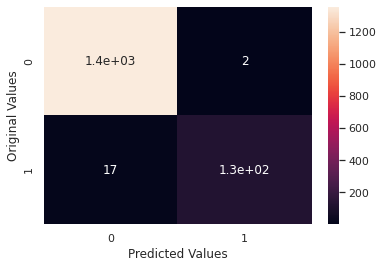

In [219]:
#Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred_RFC)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.show()

In [220]:
#Precision Score
Pr_sc_RFC = precision_score(Y_test,Y_pred_RFC)
Pr_sc_RFC

0.9844961240310077

In [221]:
#Recall score
Rs_RFC = recall_score(Y_test, Y_pred_RFC)
Rs_RFC

0.8819444444444444

In [222]:
#F1 Score
F1_RFC = f1_score(Y_test,Y_pred_RFC)
F1_RFC

0.9304029304029303

In [223]:
#ROC Area under the curve score
R_Ar_RFC = roc_auc_score(Y_test,Y_pred_RFC)
R_Ar_RFC

0.9402347590953786

So far, it seems to be the best method based on all the values. But still let us look at other Ensembling techniques.

> ### **Bagging Ensemble Classifier Model**

It is based on bagging ensembling technique which increases reliability of predictions.

In [224]:
#Building the model
from sklearn.ensemble import BaggingClassifier
Bag = BaggingClassifier(random_state=0)

In [225]:
#Fitting the model with training set
Bag.fit(X_train,Y_train['Personal Loan'])

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=0, verbose=0,
                  warm_start=False)

In [226]:
#Predicting results with test set
Y_pred_Bag=Bag.predict(X_test)

In [227]:
#Accuracy score of test set
acc_Bag = accuracy_score(Y_test,Y_pred_Bag)
acc_Bag

0.9853333333333333

In [228]:
#Accuracy score of training set
Y_pred_Bag_train = Bag.predict(X_train)
acc_Bag_train = accuracy_score(Y_train,Y_pred_Bag_train)
acc_Bag_train

0.9985714285714286

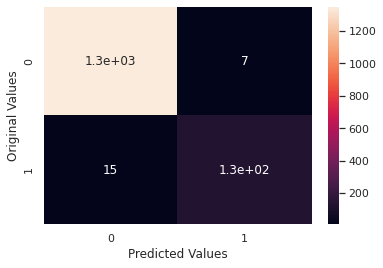

In [229]:
#Confusion Matrix
cm = confusion_matrix(Y_test,Y_pred_Bag)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.show()

So, it is also working quite well.

In [230]:
#Precision Score
Pr_sc_Bag = precision_score(Y_test,Y_pred_Bag)
Pr_sc_Bag

0.9485294117647058

In [231]:
#Recall Score
Rs_Bag = recall_score(Y_test,Y_pred_Bag)
Rs_Bag

0.8958333333333334

In [232]:
#F1 Score
F1_Bag = f1_score(Y_test,Y_pred_Bag)
F1_Bag

0.9214285714285715

In [233]:
#ROC Area under the curve score
R_Ar_Bag = roc_auc_score(Y_test,Y_pred_Bag)
R_Ar_Bag

0.9453355457227139

It is also working well.

> ### **Ada Boost Classifier Model**

It is model based on ensembling technique. 

I tried various values of n_estimators and found 100 to be best suited to our model.

In [234]:
#Buidling the model
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier(random_state=0,n_estimators=100)

In [235]:
#Fitting the model with training set
Ada.fit(X_train,Y_train['Personal Loan'])

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [236]:
#Predicting the results with test set
Y_pred_Ada=Ada.predict(X_test)

In [237]:
#Accuracy of Test set
acc_Ada = accuracy_score(Y_test,Y_pred_Ada)
acc_Ada

0.974

In [238]:
#Accuracy of training set
Y_pred_Ada_train = Ada.predict(X_train)
acc_Ada_train = accuracy_score(Y_train,Y_pred_Ada_train)
acc_Ada_train

0.9762857142857143

It is working well.

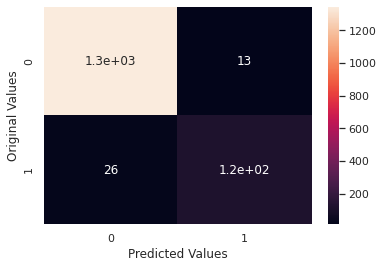

In [239]:
#Confusion Matrix
cm =confusion_matrix(Y_test,Y_pred_Ada)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.show()

It may be working well but it doesn't suit our case as it has 31 False negatives.

In [240]:
#Precision Score
Pr_sc_Ada = precision_score(Y_test,Y_pred_Ada)
Pr_sc_Ada

0.9007633587786259

In [241]:
#Recall Score
Rs_Ada = recall_score(Y_test,Y_pred_Ada)
Rs_Ada

0.8194444444444444

In [242]:
#F1 score
F1_Ada = f1_score(Y_test,Y_pred_Ada)
F1_Ada

0.858181818181818

In [243]:
#ROC Area under the curve score
R_Ar_Ada = roc_auc_score(Y_test,Y_pred_Ada)
R_Ar_Ada

0.9049287118977384

It is working well but not much suited to our case.

> ### **Gradient Boosting Classifier**

It is an ensembling technique which is used to increase predicting efficiency.

I tried various values of n_estimators and found 100 to be best suited to our model.

In [244]:
#Building the model
from sklearn.ensemble import GradientBoostingClassifier 
GB = GradientBoostingClassifier(random_state=0,n_estimators=100)

In [245]:
#Fitting the model with training set
GB.fit(X_train, Y_train['Personal Loan'])

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [246]:
#Predicting the results with test set
Y_pred_GB=GB.predict(X_test)

In [247]:
#Accuracy score of test set
acc_GB = accuracy_score(Y_test,Y_pred_GB)
acc_GB

0.9853333333333333

In [248]:
#Accuracy score of training set
Y_pred_GB_train = GB.predict(X_train)
acc_GB_train = accuracy_score(Y_train,Y_pred_GB_train)
acc_GB_train

0.9968571428571429

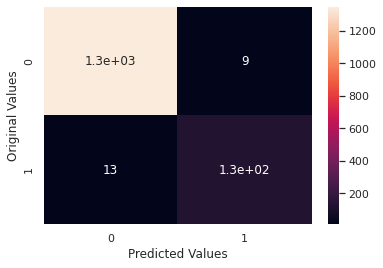

In [249]:
#Confusion Matrix
cm = confusion_matrix(Y_test,Y_pred_GB)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.show()

In [250]:
#Precision Score
Pr_sc_GB = precision_score(Y_test,Y_pred_GB)
Pr_sc_GB

0.9357142857142857

In [251]:
#Recall Score
Rs_GB = recall_score(Y_test,Y_pred_GB)
Rs_GB

0.9097222222222222

In [252]:
#F1 score
F1_GB = f1_score(Y_test,Y_pred_GB)
F1_GB

0.9225352112676057

In [253]:
#ROC Area under the score
R_Ar_GB = roc_auc_score(Y_test,Y_pred_GB)
R_Ar_GB

0.9515425270403147

It is working well.



---



---



---



# **Comparing the Models**

Now that we have seen and built various models, let us compare the models and choose the best one for our case.

> ### **Accuracies of Test sets of Models**

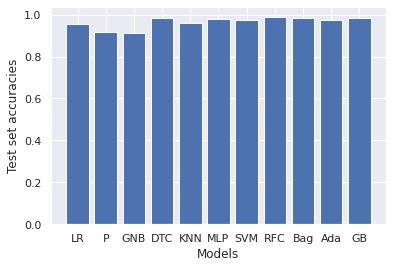

In [254]:
#Plotting Bar Graph
labels=['LR','P','GNB','DTC','KNN','MLP','SVM','RFC','Bag','Ada','GB']
Acc_Test=[acc_LR,acc_P,acc_GNB,acc_DTC,acc_KNN,acc_MLP,acc_SVM,acc_RFC,acc_Bag,acc_Ada,acc_GB]
plt.bar(labels,Acc_Test)
plt.xlabel('Models')
plt.ylabel('Test set accuracies')
plt.show()

> ### **Accuracies of Training sets of Models**

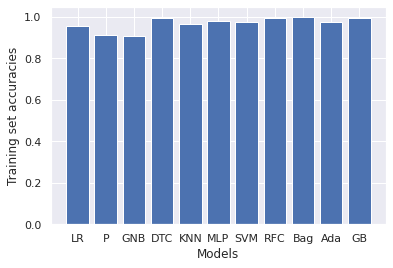

In [255]:
#Plotting Bar Graph
Acc_Train=[acc_LR_train,acc_P_train,acc_GNB_train,acc_DTC_train,acc_KNN_train,acc_MLP_train,acc_SVM_train,acc_RFC_train,acc_Bag_train,acc_Ada_train,acc_GB_train]
plt.bar(labels,Acc_Train)
plt.xlabel('Models')
plt.ylabel('Training set accuracies')
plt.show()

> ### **Precision Scores of Models**

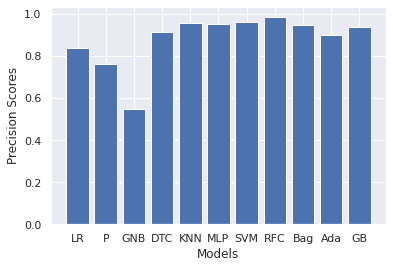

In [256]:
#Plotting Bar Graph
PS=[Pr_sc_LR,Pr_sc_P,Pr_sc_GNB,Pr_sc_DTC,Pr_sc_KNN,Pr_sc_MLP,Pr_sc_SVM,Pr_sc_RFC,Pr_sc_Bag,Pr_sc_Ada,Pr_sc_GB]
plt.bar(labels,PS)
plt.xlabel('Models')
plt.ylabel('Precision Scores')
plt.show()

> ### **Recall Scores of Models**

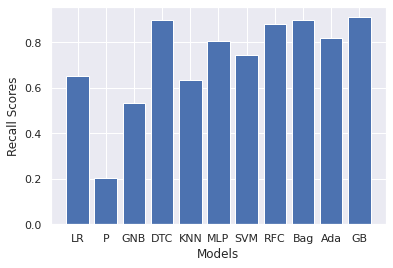

In [257]:
#Plotting Bar Graph
RS=[Rs_LR,Rs_P,Rs_GNB,Rs_DTC,Rs_KNN,Rs_MLP,Rs_SVM,Rs_RFC,Rs_Bag,Rs_Ada,Rs_GB]
plt.bar(labels,RS)
plt.xlabel('Models')
plt.ylabel('Recall Scores')
plt.show()

> ### **F1 Scores of Models**

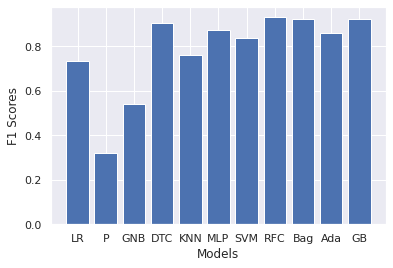

In [258]:
#Plotting Bar Graph
F1S=[F1_LR,F1_P,F1_GNB,F1_DTC,F1_KNN,F1_MLP,F1_SVM,F1_RFC,F1_Bag,F1_Ada,F1_GB]
plt.bar(labels,F1S)
plt.xlabel('Models')
plt.ylabel('F1 Scores')
plt.show()

> ### **ROC Area Under the Curve Scores of Models**

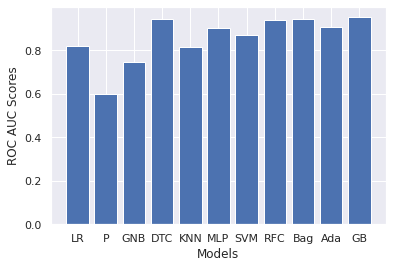

In [259]:
#Plotting Bar Graph
ROC=[R_Ar_LR,R_Ar_P,R_Ar_GNB,R_Ar_DTC,R_Ar_KNN,R_Ar_MLP,R_Ar_SVM,R_Ar_RFC,R_Ar_Bag,R_Ar_Ada,R_Ar_GB]
plt.bar(labels,ROC)
plt.xlabel('Models')
plt.ylabel('ROC AUC Scores')
plt.show()

Therefore, on the basis of the above comparison of the different types of models, we can conclude that the Random Forest Classifier is working the best for our case and hence, we should use this classifier for the purpose to know the potential customer for the Personal Loan with minimal budget campaign.



---



---



---



# **Conclusion: Business Understanding of the Project**

We made the simple step-by-step analysis of customer's features to identify patterns to effectively choose the subset of customers who have a higher probability to buy new product "Personal Loan" from The Bank. We concluded the following things:


*   We have checked all the twelve feature columns whether or not each of them has an association with the fact the product been sold.
*   The data provided to us had no null values.
*   It had the data of 5000 customers (No duplicate Ids of the customers).
*   ID's of customers had nothing to do with the loan.
*   The Experience and Age columns were highly correlated.
*   The Experience Column had faulty data i.e., it had negative values.
*   Maximum number of customers live alone.
*   Maximum number of customers are graduates.
*   9.6% of customers had taken loan in the last campaign.
*   10.44% customers have security accounts with the bank.
*   6.04% customers have Certificate of Deposit Accounts with the bank.
*   59.68% customers use Online Facilities.
*   29.4% customers have credit cards issued by Universal Bank.
*   Number of customers decrease as Income increases.
*   Many cutomers have low average credit card spending per month.
*   People with High education and High Income tend to take loan more.
*   People with security accounts tend to take loan less.
*   Mortgage, Income and Credit card average data is skewed highly.
*   Zipcodes had too many nominal data. It doesn't effect much to classify the customers.
*   More the Income and Average spending Credit Card per month of the customers, more the potential of those customers to take loan.
*   All the models which we have discussed in the project seem to work well but we need the best model suitable to identify the potential customers for purchasing loan. Hence, we have already compared and on the basis of the discussed comparison, we can conclude that the **Random Forest Classifier** is the best suited model for our case and the result, we have gotten from this model, can be trustworthy in real scenario too.







---



---



---



---



---

